In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangling Footballer Names Data
#
##########################################################################################

In [ ]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_Fottballer_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub push
#
##################################################################################################################


# Python used in this exercise
- File Input/Output
- for loop
- list
    - list methods: 
        - join()
    - list comprehension
- string
    - string methods
        - split()
        - strip()
        - slice 

In [21]:
# Python stuff used here:


the_things = [1, 2, 'A', "B", 9.4, set([1,2])]

# for loops repeat code once for each thing in the_things
for this_thing in the_things:
    print('The current thing is: ', this_thing)


The current thing is:  1
The current thing is:  2
The current thing is:  A
The current thing is:  B
The current thing is:  9.4
The current thing is:  {1, 2}


In [23]:
# Strings can be "split" into a list, on a boundary marker which you provide
string2split = '''Hello.  My name is Inigo Montoya. You killed my brother.  Prepare to die'''
print(string2split)

# split on "." 
# Note that a list of strings is returned.
# and that the split boundary character is removed.
string2split.split(".")



Hello.  My name is Inigo Montoya. You killed my brother.  Prepare to die


['Hello',
 '  My name is Inigo Montoya',
 ' You killed my brother',
 '  Prepare to die']

In [35]:
# Mini wrangle goals:
#  1) remove stray space characters
#  2) Correct "brother" to be "father"
#  3) Write as 4 sentences, returning the "." characters

for chunk in string2split.split("."):
    print(chunk)
    chunk=chunk.strip()
    print(chunk) # strip removes whitespace from the ends

    chunk = chunk.replace('brother', 'father')
    print(chunk+'.')
    

Hello
Hello
Hello.
  My name is Inigo Montoya
My name is Inigo Montoya
My name is Inigo Montoya.
 You killed my brother
You killed my brother
You killed my father.
  Prepare to die
Prepare to die
Prepare to die.


In [36]:
for chunk in string2split.split("."):
    chunk=chunk.strip()

    chunk = chunk.replace('brother', 'father')
    print(chunk+'.')

Hello.
My name is Inigo Montoya.
You killed my father.
Prepare to die.


In [42]:
#A different approach using a for-loop shortcut called
#    a List Comprehension
output = [xx.strip().replace("brother", "father") for xx in string2split.split(".")]
print(output)

print('.\n'.join(output))


['Hello', 'My name is Inigo Montoya', 'You killed my father', 'Prepare to die']
Hello.
My name is Inigo Montoya.
You killed my father.
Prepare to die


In [44]:
# as a 1-liner
print('.\n'.join([xx.strip().replace("brother", "father") for xx in string2split.split(".")]))


Hello.
My name is Inigo Montoya.
You killed my father.
Prepare to die


# Wrangling Footballer Birthdays


In [1]:
# Goal: extract footballer's dates of birth 
#  
#
# General info & data here:
#   https://www.kaggle.com/datasets/maso0dahmed/football-players-data
#
# I unzipped mine put it in the data folder
data = '../data/fifa_players.csv'


In [3]:
#read data
with open(data,'r') as thefile:
    lines = thefile.readlines()

In [25]:
testnum = 33
test_line = lines[testnum]
header = lines[0]
print(header, test_line)

name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,release_clause_euro,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
 Kepa,Kepa Arrizabalaga,10/3/1994,24,185.42,84.8,GK,Spain,84,90,31000000,92000,Right,1,4,1,Lean,63600000,Spain,85,SUB,13,25,11,17,32,18,10,25,19,36,16,34,33,41,79,39,25,71,37,51,14,18,21,15,55,24,63,19,18,16



In [5]:
# Notice that the player DOBN is in the 3rd field (field 2)
# The string split(',') method divides a string into a list of strings, 
# breaking on commas. 
print(test_line.split(','))

['Kepa', 'Kepa Arrizabalaga', '10/3/1994', '24', '185.42', '84.8', 'GK', 'Spain', '84', '90', '31000000', '92000', 'Right', '1', '4', '1', 'Lean', '63600000', 'Spain', '85', 'SUB', '13', '25', '11', '17', '32', '18', '10', '25', '19', '36', '16', '34', '33', '41', '79', '39', '25', '71', '37', '51', '14', '18', '21', '15', '55', '24', '63', '19', '18', '16\n']


In [6]:
test_line.split(',')[2]  # split and grab position-2 entry

'10/3/1994'

In [11]:
# Split the name up into a list
test_line.split(',')[2].split('/')

['10', '3', '1994']

In [19]:
# split the date of birth into different fields
dob_list = test_line.split(',')[2].split('/')
print(dob_list)

['10', '3', '1994']


In [63]:
# Set each member of the list to a meaningful name
dob_list = test_line.split(',')[2].split('/')
month = dob_list[0]
day = dob_list[1]
year = dob_list[2]

print(f'''
Birthday for element {testnum}:
    Day:   {day}
    Month: {month}
    Year:  {year}
      ''')


Birthday for element 33:
    Day:   3
    Month: 10
    Year:  1994
      


In [64]:
# print dob as a csv
for theplayer in lines:
    dob_list = theplayer.split(',')[2].split('/')
    print(','.join(dob_list))

# notice top line says "birth_date".  Skip that one!

birth_date
6,24,1987
2,14,1992
3,15,1993
6,4,1991
6,20,1991
7,8,1991
12,20,1998
6,2,1988
3,27,1986
2,14,1987
7,16,1988
5,11,1992
4,30,1992
3,21,1991
6,15,1992
11,15,1993
2,11,1995
5,4,1985
12,10,1987
3,10,1988
4,24,1987
5,6,1987
5,12,1988
3,2,1989
3,21,1989
4,11,1991
2,20,1990
12,15,1986
4,21,1992
7,12,1991
2,23,1992
2,19,1993
10,3,1994
3,19,1993
10,23,1993
12,5,1995
3,6,1996
9,3,1995
9,8,1994
12,15,1992
1,20,1995
7,18,1993
6,12,1996
1,21,1996
5,15,1997
5,11,1984
10,3,1981
12,20,1991
2,17,1990
7,14,1995
5,6,1994
4,7,1992
5,16,1989
9,4,1993
7,1,1991
1,4,1992
2,6,1995
4,3,1995
1,12,1995
5,27,1994
2,1,1994
6,13,1996
11,12,1995
2,11,1996
8,3,1993
6,17,1995
12,13,1994
7,30,1995
2,26,1997
2,11,1996
11,29,1996
4,9,1996
4,3,1996
5,12,1997
2,29,1988
2,29,1984
2,29,1988
8,12,1996
6,22,1996
1,25,1985
3,19,1988
6,17,1990
2,23,1988
4,19,1989
1,26,1987
9,8,1989
5,31,1990
5,6,1990
7,23,1987
9,19,1990
12,26,1990
8,12,1990
6,7,1988
1,13,1988
8,22,1989
2,15,1993
1,6,1993
6,25,1991
1,10,1992
2,19,1991
7,

In [65]:
# print dob as a csv

# print a new header row
print(','.join(['month','day','year']))
for theplayer in lines[1:]:  # skip the first (header) row with a slice
    dob_list = theplayer.split(',')[2].split('/')
    print(','.join(dob_list))

month,day,year
6,24,1987
2,14,1992
3,15,1993
6,4,1991
6,20,1991
7,8,1991
12,20,1998
6,2,1988
3,27,1986
2,14,1987
7,16,1988
5,11,1992
4,30,1992
3,21,1991
6,15,1992
11,15,1993
2,11,1995
5,4,1985
12,10,1987
3,10,1988
4,24,1987
5,6,1987
5,12,1988
3,2,1989
3,21,1989
4,11,1991
2,20,1990
12,15,1986
4,21,1992
7,12,1991
2,23,1992
2,19,1993
10,3,1994
3,19,1993
10,23,1993
12,5,1995
3,6,1996
9,3,1995
9,8,1994
12,15,1992
1,20,1995
7,18,1993
6,12,1996
1,21,1996
5,15,1997
5,11,1984
10,3,1981
12,20,1991
2,17,1990
7,14,1995
5,6,1994
4,7,1992
5,16,1989
9,4,1993
7,1,1991
1,4,1992
2,6,1995
4,3,1995
1,12,1995
5,27,1994
2,1,1994
6,13,1996
11,12,1995
2,11,1996
8,3,1993
6,17,1995
12,13,1994
7,30,1995
2,26,1997
2,11,1996
11,29,1996
4,9,1996
4,3,1996
5,12,1997
2,29,1988
2,29,1984
2,29,1988
8,12,1996
6,22,1996
1,25,1985
3,19,1988
6,17,1990
2,23,1988
4,19,1989
1,26,1987
9,8,1989
5,31,1990
5,6,1990
7,23,1987
9,19,1990
12,26,1990
8,12,1990
6,7,1988
1,13,1988
8,22,1989
2,15,1993
1,6,1993
6,25,1991
1,10,1992
2,19,199

In [66]:
# write csv to file for use in other tools

with open('../data/Fifa_DoBs.csv','w') as outfile:
    outfile.write(','.join(['day','month','year'])+'\n')
    
    for theplayer in lines[1:]:  # skip the first (header) row with a slice
        dob_list = theplayer.split(',')[2].split('/')
        outfile.write(','.join(dob_list)+'\n')

In [79]:
# Alternate way using a list and writelines
# 1. Add each row as an element in a list
# 2. Write entire list in one operation

outlist = []
# print a new header row
outlist.append(','.join(['month','day','year'])+'\n')
for theplayer in lines[1:]:  # skip the first (header) row with a slice
    dob_list = theplayer.split(',')[2].split('/')
    outlist.append(','.join(dob_list)+'\n')

outlist[0:15]


['month,day,year\n',
 '6,24,1987\n',
 '2,14,1992\n',
 '3,15,1993\n',
 '6,4,1991\n',
 '6,20,1991\n',
 '7,8,1991\n',
 '12,20,1998\n',
 '6,2,1988\n',
 '3,27,1986\n',
 '2,14,1987\n',
 '7,16,1988\n',
 '5,11,1992\n',
 '4,30,1992\n',
 '3,21,1991\n']

In [80]:
with open('../data/Fifa_DoBs.csv','w') as outfile:
    outfile.writelines(outlist)

In [74]:
# Getting help
outfile.writelines?

Signature: outfile.writelines(lines, /)
Docstring:
Write a list of lines to stream.

Line separators are not added, so it is usual for each of the
lines provided to have a line separator at the end.
Type:      builtin_function_or_method

In [81]:
# Stretch: Make a histogram of player birth months

import pandas as pd
df = pd.read_csv('../data/Fifa_DoBs.csv')
df

,month,day,year
0,6,24,1987
1,2,14,1992
2,3,15,1993
3,6,4,1991
4,6,20,1991
...,...,...,...
17949,10,7,1993
17950,2,2,1996
17951,4,9,1996
17952,6,19,1997


array([[<Axes: title={'center': 'month'}>]], dtype=object)

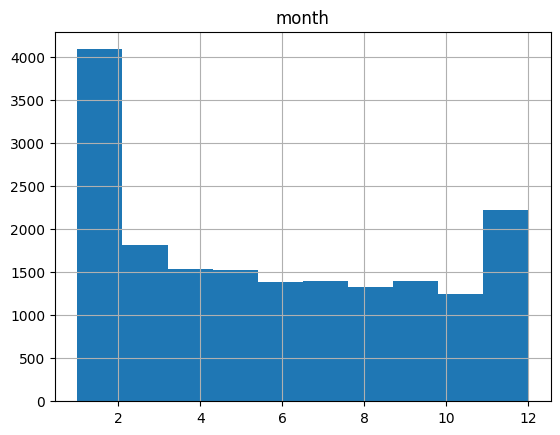

In [82]:
df.hist('month')

In [83]:
# Weird!  Is that real?  What is happeneing?



In [88]:
# From my daughter
# My friend's dad is a professional footballer.  Is he in there?  His name is Tom Clarke

df2 = pd.read_csv('../data/fifa_players.csv')
df2.iloc[["Tom Clarke" in xx for xx in df2.full_name]]

['T. Clarke,Tom Clarke,12/21/1987,31,154.94,77.1,"CB,RB",England,71,71,1800000,9000,Right,1,3,2,Normal,3300000,,,,,40,21,68,42,35,26,25,21,41,44,50,57,60,63,67,55,91,66,80,27,85,70,29,34,16,57,74,71,68\n']

In [97]:
df2.loc[14642]

name                              T. Clarke
full_name                        Tom Clarke
birth_date                       12/21/1987
age                                      31
height_cm                            154.94
weight_kgs                             77.1
positions                             CB,RB
nationality                         England
overall_rating                           71
potential                                71
value_euro                        1800000.0
wage_euro                            9000.0
preferred_foot                        Right
international_reputation(1-5)             1
weak_foot(1-5)                            3
skill_moves(1-5)                          2
body_type                            Normal
release_clause_euro               3300000.0
national_team                           NaN
national_rating                         NaN
national_team_position                  NaN
national_jersey_number                  NaN
crossing                        